### Here we'll import data of Second hand cars and their price which is determined by several factors 


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [3]:
rawdata = pd.read_csv("car-resale-data.csv")

In [4]:
rawdata.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
rawdata.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


#### here the model of the car holds less descriptive power, so drop it 
#### also count of some variables show us that there are some missing values

In [7]:
data = rawdata.drop(["Model"],axis = 1)

In [11]:
data.isnull().sum()              

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [12]:
data1 = data.dropna(axis=0)  #to delete missing values when they are <5% of the whole dataset 

In [15]:
data1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


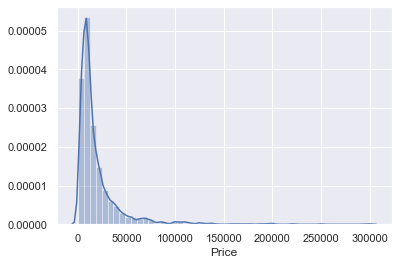

In [17]:
sns.distplot(data1["Price"])

##### we can easily check the distribution of the data by forming a PDF , it helps us to locate outliers(Above data ranges from 600 to 300000) 
##### to tackle outliers we can simply remove top/ bottom 0.5% or 1% of the data 

In [18]:
q = data1["Price"].quantile(0.99)
data2 = data1[data1["Price"]< q ]

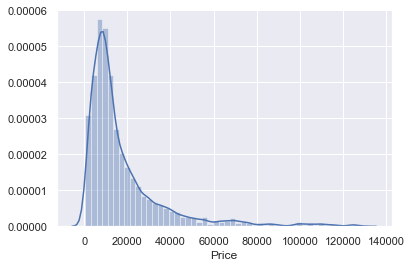

In [19]:
sns.distplot(data2["Price"]) 

### Similarly for EngineVolume, Year and Mileage

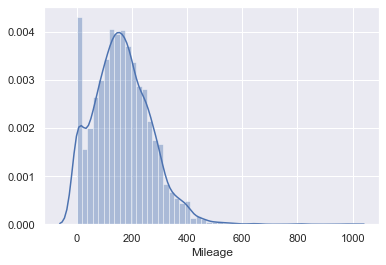

In [23]:
sns.distplot(data2["Mileage"])

In [21]:
r = data2["Mileage"].quantile(0.99)
data3 = data2[data2["Mileage"] < r ]

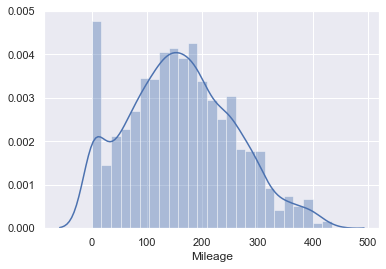

In [22]:
sns.distplot(data3["Mileage"])

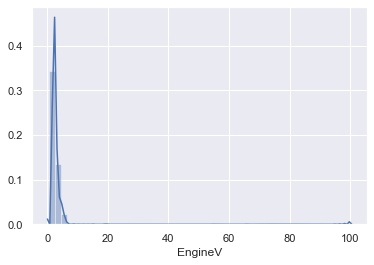

In [24]:
sns.distplot(data3["EngineV"])

##### EngineV data consists of many incorrect values because when we google it states that engine vol should be at max approx 6.5, therefore instead of removing top 1% we'll limit the data till 6.5

In [25]:
data4 = data3[data3["EngineV"]< 6.5]

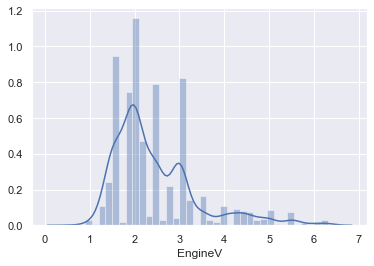

In [26]:
sns.distplot(data4["EngineV"])

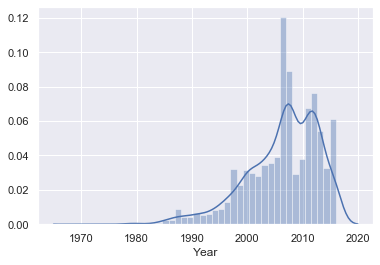

In [27]:
sns.distplot(data4["Year"])

In [35]:
y = data4["Year"].quantile(0.01)
data5 = data4[data4["Year"]> y]

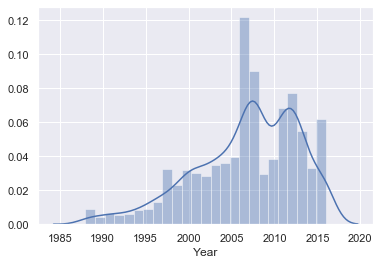

In [36]:
sns.distplot(data5["Year"])

In [39]:
datapreprocessed = data5.reset_index(drop = True)

##### once we reset the index, a new column will be created containing the old index (just in case), We won't be needing it, thus 'drop=True' to completely forget about it

In [40]:
datapreprocessed.describe(include= "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


##### deleted about 250 observations while cleaning and preprocessing data


# Checking OLS assumptions - 

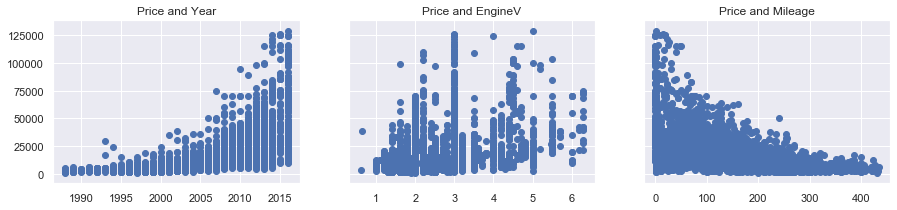

In [42]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(datapreprocessed['Year'],datapreprocessed['Price'])
ax1.set_title('Price and Year')
ax2.scatter(datapreprocessed['EngineV'],datapreprocessed['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(datapreprocessed['Mileage'],datapreprocessed['Price'])
ax3.set_title('Price and Mileage')


plt.show()

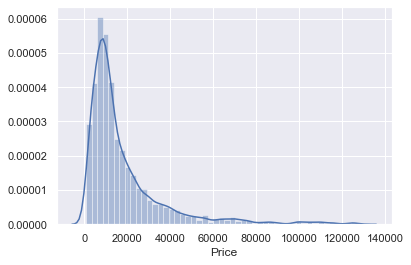

In [43]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(datapreprocessed['Price'])

### Relaxing assumptions 

In [46]:
log_price = np.log(datapreprocessed["Price"])
datapreprocessed["log_price"] = log_price

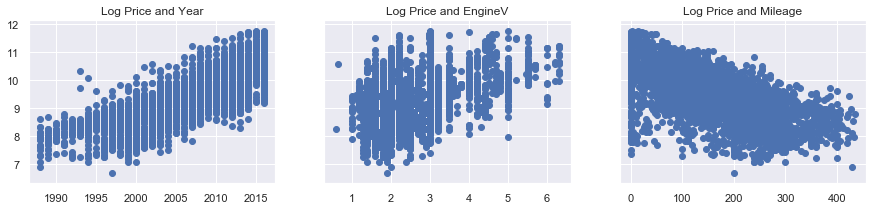

In [47]:
# checking the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(datapreprocessed['Year'],datapreprocessed['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(datapreprocessed['EngineV'],datapreprocessed['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(datapreprocessed['Mileage'],datapreprocessed['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship

In [53]:
#we'll be using log price in further steps 
datapreprocessed= datapreprocessed.drop(["Price"],axis=1)

### Multicollinearity 

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = datapreprocessed[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [55]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [57]:
# Since Year has the highest VIF, I will remove it from the model

datapreprocessed = datapreprocessed.drop(['Year'],axis=1)

## Creating Dummies 

In [70]:
data_dummies = pd.get_dummies(datapreprocessed, drop_first = True) #drop one to prevent introducing multicollinearity 

In [62]:
data_dummies.columns.values

array(['Mileage', 'EngineV', 'Log Price', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [74]:
cols = ['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [78]:
data_cleaned = data_dummies[cols]
data_cleaned.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Regression Model

In [79]:
target = data_cleaned["log_price"]
inputs = data_cleaned.drop(["log_price"], axis = 1)

In [82]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train,x_test , y_train, y_test = train_test_split(inputs_scaled, target, test_size= 0.2, random_state=365 )

In [94]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
y_hat = reg.predict(x_train)

In [97]:
reg.score(x_train,y_train)

0.744996578792662

In [100]:
reg.intercept_

9.415239458021299

In [101]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])